In [2]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('TSLA.csv')
df = df[['Date', 'Close']]


In [9]:
df.head()


,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [10]:
df.tail()


,Date,Close
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983
757,2022-05-20,663.900024


<AxesSubplot: >

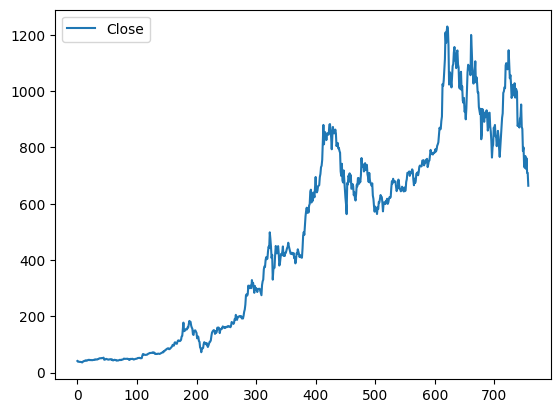

In [11]:
df.plot()


In [12]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [13]:
dir(Prophet)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components'

In [14]:
# Initialize the Model
model=Prophet()

In [15]:
df.columns


Index(['ds', 'y'], dtype='object')

In [16]:
df.dropna(axis=0,inplace=True)


In [17]:
df.head()


,ds,y
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [18]:
model.fit(df)


19:40:41 - cmdstanpy - INFO - Chain [1] start processing
19:40:42 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
model.component_modes


{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [20]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [21]:
future_dates.tail()


,ds
1118,2023-05-16
1119,2023-05-17
1120,2023-05-18
1121,2023-05-19
1122,2023-05-20


In [23]:
prediction=model.predict(future_dates)


In [24]:
prediction.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-21,144.741962,-52.999885,113.447245,144.741962,144.741962,-113.574944,-113.574944,-113.574944,22.026766,22.026766,22.026766,-135.601710,-135.601710,-135.601710,0.0,0.0,0.0,31.167018
1,2019-05-22,143.888289,-50.862988,111.814985,143.888289,143.888289,-112.736338,-112.736338,-112.736338,22.501753,22.501753,22.501753,-135.238091,-135.238091,-135.238091,0.0,0.0,0.0,31.151951
2,2019-05-23,143.034616,-59.621091,111.998091,143.034616,143.034616,-115.303068,-115.303068,-115.303068,19.029746,19.029746,19.029746,-134.332814,-134.332814,-134.332814,0.0,0.0,0.0,27.731548
3,2019-05-24,142.180943,-57.358248,110.951942,142.180943,142.180943,-115.117306,-115.117306,-115.117306,17.825671,17.825671,17.825671,-132.942977,-132.942977,-132.942977,0.0,0.0,0.0,27.063636
4,2019-05-28,138.766250,-49.383998,120.103784,138.766250,138.766250,-101.891458,-101.891458,-101.891458,22.026766,22.026766,22.026766,-123.918224,-123.918224,-123.918224,0.0,0.0,0.0,36.874791


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


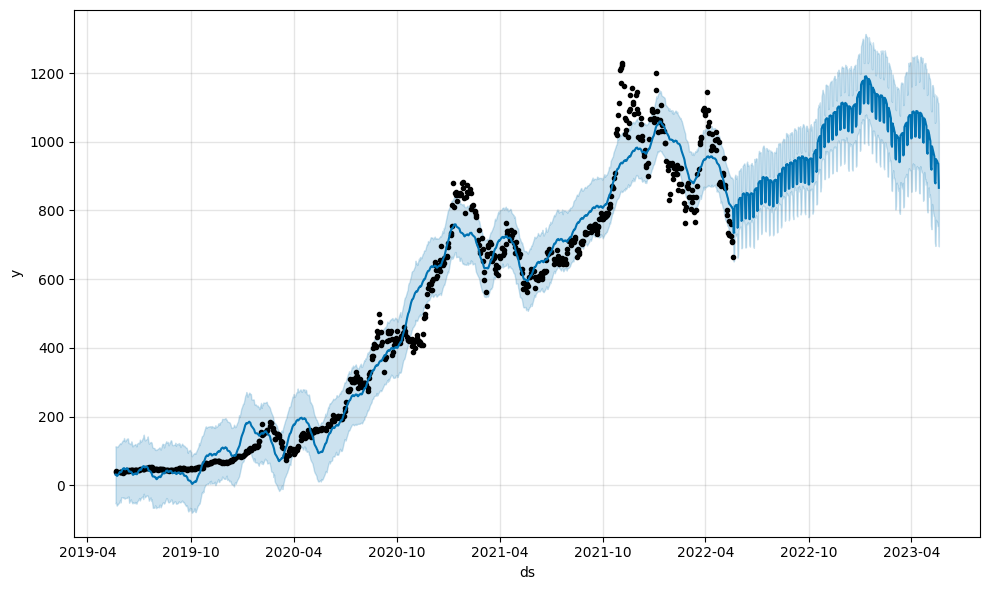

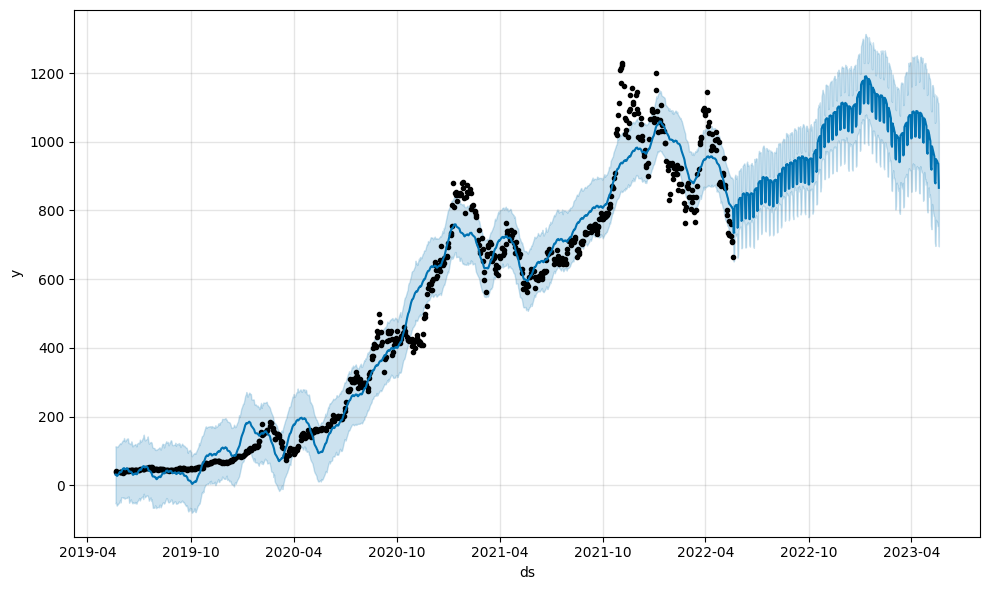

In [25]:
### plot the predicted projection
model.plot(prediction)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

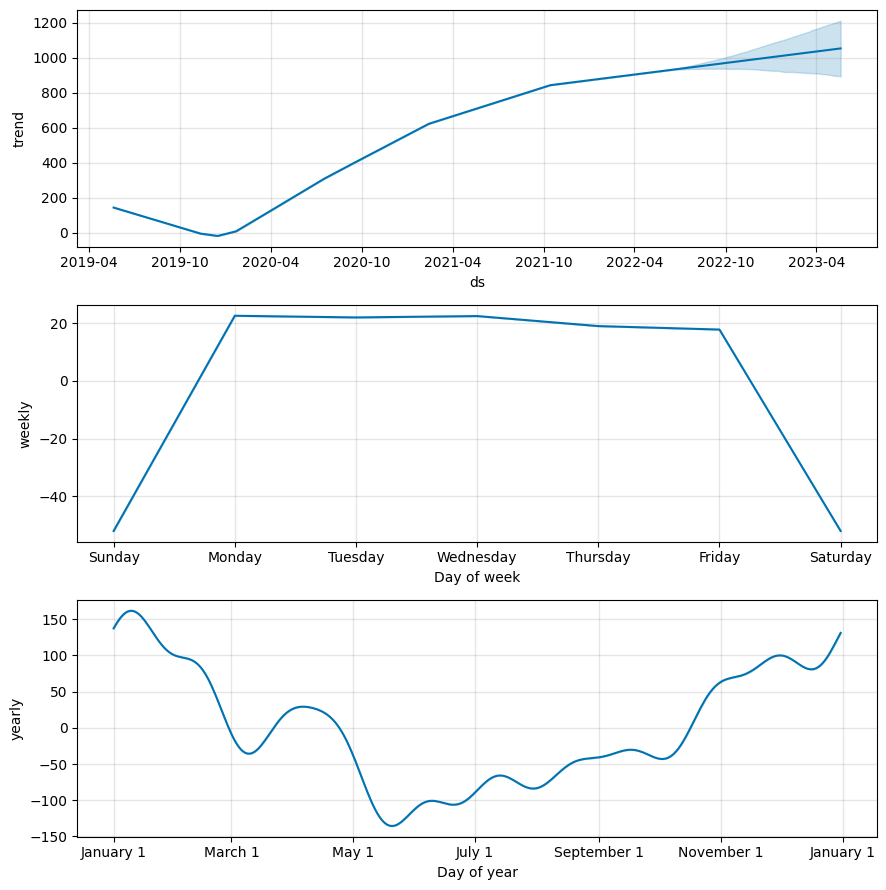

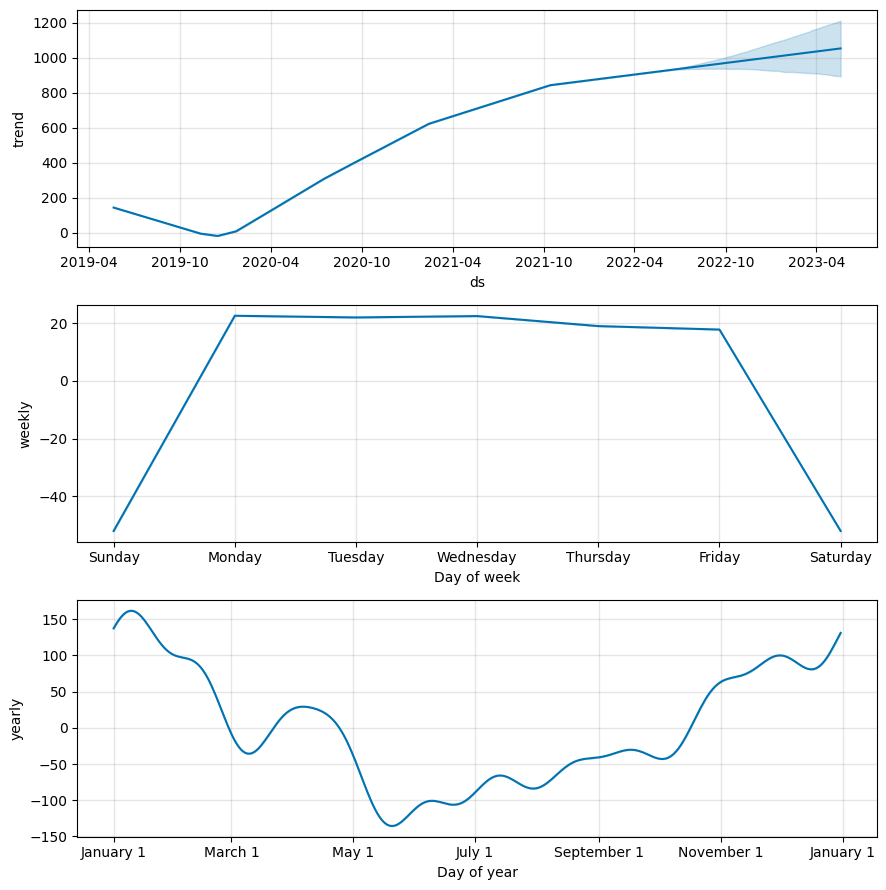

In [26]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [ ]:
# Time Series Analysis

# 1960-1962
# Cross Validation
# 1960-61---Train dataset
# 1961-62--Test dataset
# 1962-63---Validation

In [27]:
df.head()


,ds,y
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [29]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

19:45:26 - cmdstanpy - INFO - Chain [1] start processing
19:45:26 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-05-21,631.463446,593.927580,672.444353,580.880005,2021-05-20
1,2021-05-24,639.145723,601.254733,678.144311,606.440002,2021-05-20
2,2021-05-25,642.886580,600.673690,680.442413,604.690002,2021-05-20
3,2021-05-26,645.174920,604.684991,684.818042,619.130005,2021-05-20
4,2021-05-27,647.534914,608.168656,687.330803,630.849976,2021-05-20


In [30]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2757.778330,52.514554,47.437443,0.078209,0.079606,0.074618,0.32
1,39 days,2663.084213,51.605079,45.967396,0.075529,0.070480,0.072092,0.36
2,40 days,2620.466495,51.190492,44.741349,0.073493,0.070480,0.070112,0.36
3,41 days,2562.195557,50.618135,43.272884,0.071054,0.070480,0.067750,0.36
4,42 days,2536.480990,50.363489,42.469326,0.069722,0.070480,0.066452,0.36


In [31]:
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2757.778330,52.514554,47.437443,0.078209,0.079606,0.074618,0.32
1,39 days,2663.084213,51.605079,45.967396,0.075529,0.070480,0.072092,0.36
2,40 days,2620.466495,51.190492,44.741349,0.073493,0.070480,0.070112,0.36
3,41 days,2562.195557,50.618135,43.272884,0.071054,0.070480,0.067750,0.36
4,42 days,2536.480990,50.363489,42.469326,0.069722,0.070480,0.066452,0.36


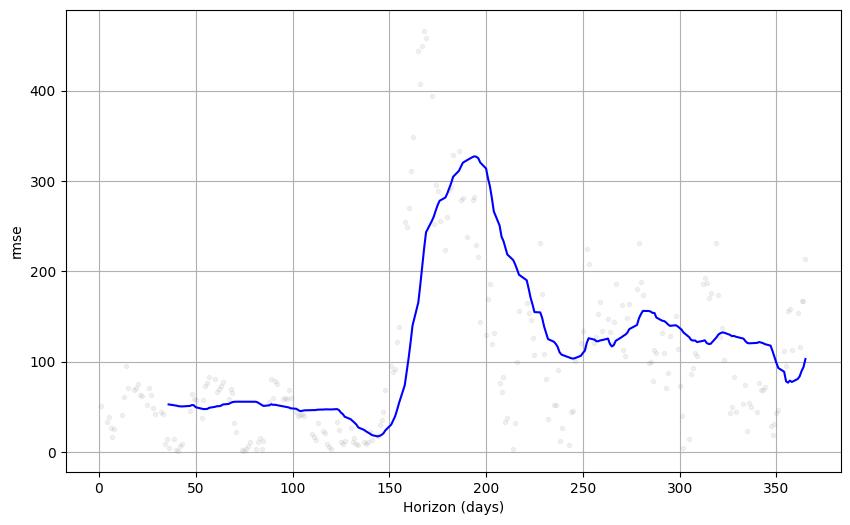

In [33]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')